**Attention** 

Il sera parfois nécessaire d'importer un fichier sur le Drive, et de changer les chemins dans les codes pour que tout s'exécute correctement.

## Chargement des packages

In [ ]:
install.packages("ClustOfVar")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘PCAmixdata’




In [ ]:
library(reshape2)
library(ggplot2)
#library(corrplot)
#library(GGally)
#library(factoextra)
#library(pheatmap)
#library(dendextend)
library(ClustOfVar)

## Chargement des données

Dans le menu à gauche, cliquer sur l'icône dossier puis "Importer" et sélectionner le fichier base_E3N_TDC.csv, puis exécuter les cellules suivantes.

In [ ]:
base_E3N <- read.csv("base_E3N_TDC.csv", header = TRUE, sep =";", stringsAsFactors = TRUE)
X = base_E3N[, 1:NCOL(base_E3N)]
str(X)
summary(X)

'data.frame':	98995 obs. of  52 variables:
 $ ident               : int  100026 100030 100035 100056 100060 100065 100067 100069 100071 100072 ...
 $ taille              : num  160 158 164 156 160 158 167 164 162 166 ...
 $ imcq1               : num  22.3 22.4 20.8 21.4 26.6 ...
 $ ageq1               : num  52.3 45.2 40.8 44.7 53.3 ...
 $ soleil              : int  2 1 2 3 3 2 1 2 2 3 ...
 $ soleil1             : int  0 1 0 0 0 0 1 0 0 0 ...
 $ soleil2             : int  1 0 1 0 0 1 0 1 1 0 ...
 $ soleil3             : int  0 0 0 1 1 0 0 0 0 1 ...
 $ encoupleQ1          : int  0 1 1 1 1 1 1 1 0 0 ...
 $ age1ergross         : int  26 27 20 19 21 20 NA 24 26 23 ...
 $ nbenfvivmn          : int  3 2 2 3 3 3 3 2 0 3 ...
 $ allaitement_dureecum: num  NA 0 0 2.5 1 0 NA 2.5 0 7.5 ...
 $ meno1               : int  0 0 1 0 1 0 0 0 1 1 ...
 $ meno2               : int  1 1 0 1 0 1 1 0 0 0 ...
 $ meno3               : int  0 0 0 0 0 0 0 1 0 0 ...
 $ meno4               : int  0 0 0 0 0 0 0 0 0 0

     ident            taille          imcq1           ageq1      
 Min.   :100026   Min.   :134.0   Min.   :12.98   Min.   :38.54  
 1st Qu.:316074   1st Qu.:158.0   1st Qu.:20.45   1st Qu.:43.60  
 Median :443324   Median :161.0   Median :22.04   Median :48.21  
 Mean   :441969   Mean   :161.6   Mean   :22.63   Mean   :49.41  
 3rd Qu.:568311   3rd Qu.:165.0   3rd Qu.:24.09   3rd Qu.:54.20  
 Max.   :760069   Max.   :190.0   Max.   :59.87   Max.   :66.08  
                  NA's   :167     NA's   :2314                   
     soleil         soleil1          soleil2          soleil3      
 Min.   :1.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:2.000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :2.000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :2.054   Mean   :0.2295   Mean   :0.4662   Mean   :0.2825  
 3rd Qu.:3.000   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :3.000   Max.   :1.0000   Max.   :1.0000   Max.   :1.000

## Nettoyage des données


On commence par remplacer le type Factor par le type num ou int

In [ ]:
X$MENO <- as.numeric(levels(X$MENO))[as.integer(X$MENO)]
X$MENOAGE <- as.numeric(levels(X$MENOAGE))[as.integer(X$MENOAGE)]
X$REGLAGE <- as.numeric(levels(X$REGLAGE))[as.integer(X$REGLAGE)]
X$RHUMATO <- as.numeric(levels(X$RHUMATO))[as.integer(X$RHUMATO)]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


On met 0 au lieu de 1 pour les non asthmatiques (colonne **MS060**)

In [ ]:
X$MS060[X$MS060==1] <- 0 

On remplace les données manquantes par des 0 dans **encoupleQ1, nbenfvivmn, MS060** (0 dans MS060, 1 dans asthme1), **OSTEOP, RHUMATO**

In [ ]:
X$encoupleQ1[is.na(X$encoupleQ1)] <- 0
X$nbenfvivmn[is.na(X$nbenfvivmn)] <- 0
X$MS060[is.na(X$MS060)] <- 0
X$asthme1[X$MS060==0]<-1
X$OSTEOP[is.na(X$OSTEOP)] <- 0
X$RHUMATO[is.na(X$RHUMATO)] <- 0

On remplace les données manquantes dans **taille, imcq1, age1ergross, alcoolq3, fruits, legumes, fruitslegumes, fruitslegumesbis et aphyq** par la moyenne pour ces colonnes

In [ ]:
X$taille[is.na(X$taille)] <- mean(X$taille[!is.na(X$taille)])
X$imcq1[is.na(X$imcq1)] <- mean(X$imcq1[!is.na(X$imcq1)])
X$age1ergross[is.na(X$age1ergross) & X$nbenfvivmn>0] <- mean(X$age1ergross[!is.na(X$age1ergross)])
X$alcoolq3[is.na(X$alcoolq3)] <- mean(X$alcoolq3[!is.na(X$alcoolq3)])
X$fruits[is.na(X$fruits)] <- mean(!is.na(X$fruits))
X$legumes[is.na(X$legumes)] <- mean(!is.na(X$legumes))
X$fruitslegumes[is.na(X$fruitslegumes)] <- mean(!is.na(X$fruitslegumes))
X$fruitslegumesbis[is.na(X$fruitslegumesbis)] <- mean(!is.na(X$fruitslegumesbis))
X$aphyq[is.na(X$aphyq)] <- mean(X$aphyq[!is.na(X$aphyq)])

On remplace remplace les NAs par 2 dans **soleil** (la moyenne étant de 2.054) et dans **niv_etude**, (moyenne = 2.22).
On modifie également les colonnes du TDC pour prendre en compte ces modifications.

In [ ]:
X$soleil[is.na(X$soleil)] <- 2
X$soleil2[X$soleil==2]<-1

X$niv_etude[is.na(X$niv_etude)] <- 2
X$etude2[X$niv_etude==2] <- 1

**Colonne allaitement**

Durée moyenne d'allaitement par enfant : dmape

In [ ]:
Y=X$allaitement_dureecum[!is.na(X$nbenfvivmn) & X$nbenfvivmn>0 & !is.na(X$allaitement_dureecum)]/X$nbenfvivmn[!is.na(X$nbenfvivmn) & X$nbenfvivmn>0 & !is.na(X$allaitement_dureecum)]
mean(Y)
dmape = mean(Y)
dmape = 1.37 # en fait mon calcul est faux oupsi

[1] 1.589222

On remplace la durée d'allaitement par dmape*nb enfants 

In [ ]:
X$allaitement_dureecum[is.na(X$allaitement_dureecum)]<-dmape*X$nbenfvivmn[is.na(X$allaitement_dureecum)]

**MENO** : Si un âge de ménopause est indiqué, ou si la femme avait plus de 53 ans lors de son inclusion dans la cohorte (et a eu ses règles dans sa vie), on considère que la femme est ménopausée, sinon non.
Si MENO = 2 mais un âge de ménopause est indiqué, on passe MENO à 1 si ageq1-MENOAGE > 7, et à 3 si ageq1-MENOAGE <= 7. 

Pourcentages calculés grâce aux données :

*   ageq1 < 48.11 --> 88% MENO = 2
*   48.11 < ageq1 < 53 --> 33% MENO = 1, 33% MENO = 2, 33% MENO = 3
*   ageq1 > 53 --> 89% MENO = 1

In [ ]:
X$MENO[is.na(X$MENO) & ( !is.na(X$MENOAGE) | (is.na(X$MENOAGE) & X$ageq1>53))]<- 1
X$MENO[!is.na(X$MENOAGE) & (X$MENO == 4 & (X$ageq1 - X$MENOAGE > 7))| (X$MENO == 2 & (X$ageq1 - X$MENOAGE > 7)) ) ] <- 1


X$MENO[ is.na(X$MENO) & is.na(X$MENOAGE) & X$ageq1<=48.11] <- 2

X$MENO[ is.na(X$MENO) & is.na(X$MENOAGE) & 48.11<=X$ageq1 & X$ageq1<=53] <- 3
X$MENO[!is.na(X$MENOAGE) & (X$MENO == 4 & (X$ageq1 - X$MENOAGE <= 7)) | (X$MENO == 2 & (X$ageq1 - X$MENOAGE <= 7)) ] <- 3

X$meno1[X$MENO==1] <- 1
X$meno1[X$MENO!=1] <- 0

X$meno2[X$MENO==2] <- 1
X$meno2[X$MENO!=2] <- 0

X$meno3[X$MENO==3] <- 1
X$meno3[X$MENO!=3] <- 0

X$meno4[X$MENO==4] <- 1
X$meno4[X$MENO!=4] <- 0

**MENOAGE** : Lorsque l'on sait que la femme a été ménopausée, on remplace NA par l'âge moyen de ménopause ou par l'âge de la femme si elle est plus âgée que cette moyenne.


In [ ]:
X$MENOAGE[is.na(X$MENOAGE) & X$MENO == 1] <- max(mean(X$MENOAGE[!is.na(X$MENOAGE)]) , X$ageq1 + 1)
X$MENOAGE[is.na(X$MENOAGE) & X$MENO == 3] <- max(mean(X$MENOAGE[!is.na(X$MENOAGE)]) , X$ageq1)

**REGLAGE** : 
On remplace les valeurs négatives par des valeurs positives

On remplace par l'âge moyen (en supposant que toutes les femmes ont eu leurs règles, sauf si elles ont précisé le contraire)

In [ ]:
X$REGLAGE[!is.na(X$REGLAGE) & X$REGLAGE < 0 ] <- abs(X$REGLAGE[!is.na(X$REGLAGE) & X$REGLAGE < 0 ])
X$REGLAGE[is.na(X$REGLAGE) & X$meno4!=1] <- mean(X$REGLAGE[!is.na(X$REGLAGE)])
summary(X$meno4)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000000 0.0000000 0.0002727 0.0000000 1.0000000 

**Tabac** On remplace les NAs par "3" (on considère les femmes non fumeuses par défaut)

In [ ]:
X$tabacq1[is.na(X$tabacq1)]<-3
X$tabac3[X$tabacq1==3] <- 1

On vérifie que tout va bien

In [ ]:
summary(X)

     ident            taille          imcq1           ageq1      
 Min.   :100026   Min.   :134.0   Min.   :12.98   Min.   :38.54  
 1st Qu.:316074   1st Qu.:158.0   1st Qu.:20.55   1st Qu.:43.60  
 Median :443324   Median :161.0   Median :22.14   Median :48.21  
 Mean   :441969   Mean   :161.6   Mean   :22.63   Mean   :49.41  
 3rd Qu.:568311   3rd Qu.:165.0   3rd Qu.:24.03   3rd Qu.:54.20  
 Max.   :760069   Max.   :190.0   Max.   :59.87   Max.   :66.08  
                                                                 
     soleil         soleil1          soleil2         soleil3      
 Min.   :1.000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:2.000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :2.000   Median :0.0000   Median :0.000   Median :0.0000  
 Mean   :2.053   Mean   :0.2295   Mean   :0.488   Mean   :0.2825  
 3rd Qu.:3.000   3rd Qu.:0.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :3.000   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
   

## Exportation des données nettoyées

In [ ]:
write.csv(X,"base_E3N_clean.csv", row.names = TRUE)

## Clustering

In [ ]:
X <- read.csv("base_E3N_clean.csv", header = TRUE, sep =",", stringsAsFactors = TRUE)

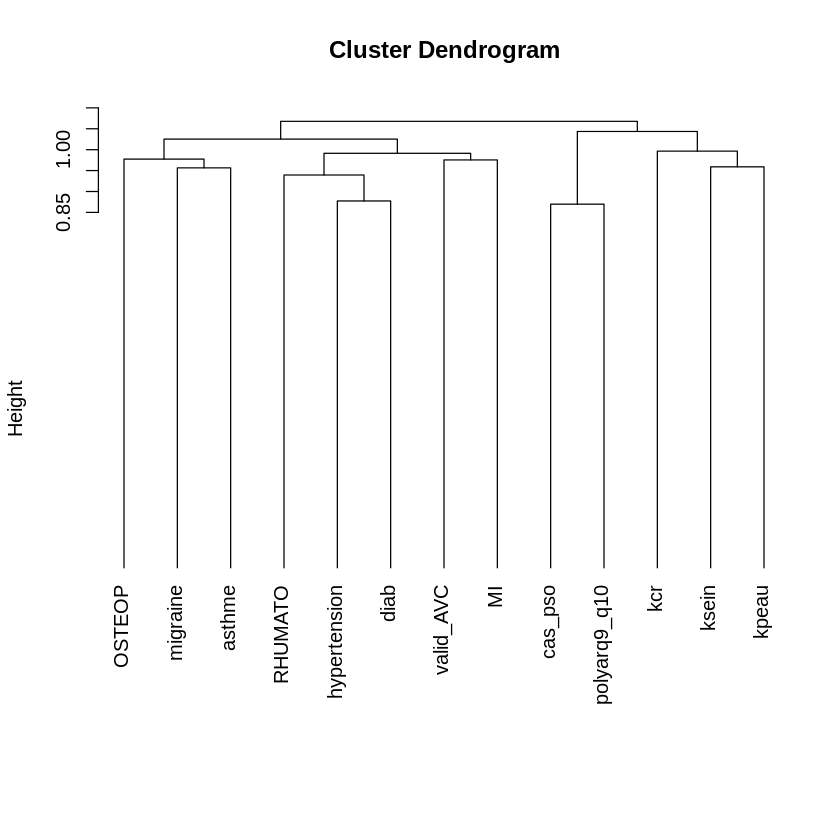

In [ ]:
# On crée une seule colonne pour la migraine : 1 si cas de migraine (ancien ou actuel), 0 si non cas ; idem pour l'asthme

X$migraine <- X$migraine1 + X$migraine2
X$asthme <- X$asthme2 + X$asthme3

# On réalise le clustering avec la bibliothèque ClustOfVar 

arbre <- hclustvar(X.quanti = X[c(39, 44:55)])
plot(arbre)

In [ ]:
#Dendrogramme sur les populations

Y = X[1:100,c(37, 42:53)]
Y =scale(Y)
dmat <-dist(Y, method = "euclidean")^2
pheatmap(as.matrix(dmat),cluster_rows = FALSE,cluster_cols = FALSE,fontsize=6)
fit.hc <-hclust(dmat, method = "ward.D")
plot(fit.hc)
rect.hclust(fit.hc, k=5)

## K-Means


In [ ]:
X <- read.csv("base_E3N_clean.csv", header = TRUE, sep =",", stringsAsFactors = TRUE)

X$migraine <- X$migraine1 + X$migraine2
X$asthme <- X$asthme2 + X$asthme3

Y = X[,c(37, 42:53)]


# k-means

groupes.kmeans <- kmeans(Y,centers=8,nstart=10)
print(groupes.kmeans)

#(1)évaluer la proportion d'inertie expliquée
inertie.expl <- rep(0,times=10)
for (k in 2:20){
  clus <- kmeans(Y,centers=k,nstart=10)
  inertie.expl[k] <- clus$betweenss/clus$totss
}
#graphique
plot(1:20,inertie.expl,type="b",xlab="Nb. de groupes",ylab="% inertie expliquée")

On s'aperçoit par exemple pour le clustering à 6 groupes qu'on obtient des groupes assez significativement distincts. En effet le cluster 1 semble apparaître comme un cluster "sain": il se caractérise par l'absence totale de cas de d'hypertension, de migraine et de rhumatismes et par une fréquence significativement plus basse des autres maladies. A l'opposé, le cluster 4 est "le plus malade": on a 100% de rhumatismes et d'hypertension, et une fréquence significativement plus élevé des autres maladies. Les autres groupes sont toutefois plus difficiles à interpréter, le 5 semble associer 100% d'hypertension à une haute fréquence de diabète en l'absence de migraines et de rhumatismes, le 6 est simplement l'ensemble des femmes touchées par un cancer du sein, et les cluster 2 et 3 restent en réalité assez proches de la moyenne.


Le K-means ne semble pas très pertinent ici car l'algorithme essaye de répartir les 0 et les 1 et ne réparti pas vraiment les gens qui ont les mêmes maladies. 
On va donc essayer de faire un dendrogramme sur la population. 

## Matrice des corrélations

In [ ]:
X <- read.csv("base_E3N_clean.csv", header = TRUE, sep =",", stringsAsFactors = TRUE)

X$migraine <- X$migraine1 + X$migraine2
X$asthme <- X$asthme2 + X$asthme3

Y = X[,c(37, 42:53)]

##Entre les maladies : 
mcor <-cor(Y)
corrplot(mcor, type = "upper")

##Entre les maladies et les facteurs : 
# On crée une seule colonne pour le tabac : 1 si la personne fume ou a déjà fumé, 0 sinon ; idem pour la menopause
X$tabac <- X$tabac1 + X$tabac2
X$menopause <- X$meno1 + X$meno3

Z=X[,c(2:4,8,10,11,19,22,24:25,37, 42:55)]
Z=scale(Z)
mcorT <-cor(Z)
corrplot(mcorT, type = "upper")

Warning message in file(file, "rt"):
“cannot open file 'base_E3N_clean.csv': No such file or directory”


ERROR: ignored

### ACP 

In [ ]:
base_E3N <- read.csv("E:/Documents/ETUDES/CentraleSupelec/1A/base_E3N_clean.csv", header = TRUE, sep = ",", stringsAsFactors = TRUE)

X = base_E3N[, 3:NCOL(base_E3N)]
X$migraine <- X$migraine1 + X$migraine2
X$asthme <- X$asthme2 + X$asthme3
X$tabac <- X$tabac1 + X$tabac2
X$menopause <- X$meno1 + X$meno3

str(X)
summary(X)

Y = X[,c(37, 42:53)]
str(Y)

res.pca <- PCA(Y, scale.unit = TRUE, ncp = 5, graph = FALSE)
print(res.pca)
get_eigenvalue(res.pca) #donne les valeurs propres
fviz_pca_biplot(res.pca) #trace le biplot
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50)) #trace le pourentage expliqué de variance par chaque valeur propre

var <- get_pca_var(res.pca)

# Qualite de representation cos2
corrplot(var$cos2, is.corr=FALSE)
head(var$cos2, 13) 
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
)

#contribution des variables sur chaque dimension
corrplot(var$contrib, is.corr=FALSE) 
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
)

# Contributions des variables à PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions des variables à PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)


##colorer les variables en fonction des cluester du k-means

# Créez une variable de regroupement en utilisant kmeans
# Créez 3 groupes de variables (centers = 3)
set.seed(123)
res.km <- kmeans(var$coord, centers = 4, nstart = 25)
grp <- as.factor(res.km$cluster)
# Colorer les variables par groupes
fviz_pca_var(res.pca, col.var = grp, 
             palette = c("#0073C2FF", "#EFC000FF", "#868686FF","#0A0A2A"),
             legend.title = "Cluster")

## Resultat par indivius

ind <- get_pca_ind(res.pca)

# Colorer les indiv qui ont une facteur ou une maladie
Y$color <- X$hypertension
Y$color[X$hypertension==1] <- 'oui'
Y$color[X$hypertension==0] <- 'non'

fviz_pca_ind(res.pca,
             geom.ind = "point", # Montre les points seulement (mais pas le "text")
             col.ind = Y$color, # colorer by groups
             palette = c("#00AFBB", "#E7B800"),
             addEllipses = TRUE, # Ellipses de concentration
             legend.title = "Hypertension"
)

fviz_pca_biplot (res.pca,
                 col.ind = Y$color, palette = c("#00AFBB", "#E7B800"),
                 addEllipses = TRUE, label = "var",
                 col.var = "black", repel = TRUE,
                 legend.title = "Hypertension")

# Colorer les indiv d'un cluster (cluster fait sur les coordonnées des points par k-means)
groupes.kmeans <- kmeans(ind$coord,centers=5,nstart=100)
print(groupes.kmeans)
grp <- as.factor(groupes.kmeans$cluster)
fviz_pca_biplot (res.pca,
                 col.ind = grp, palette = c("#00AFBB", "#E7B800","#EA0034","#B610BF","#9AF000"),
                 addEllipses = TRUE, label = "var",
                 col.var = "black", repel = TRUE,
                 legend.title = "Cluster")


Cette matrice de covariance semble assez cohérente (on voit imc et diabète corrélé, rhumato et âge aussi par exemple). Cependant on pourrait s'attendre à voir cancer de la peau et soleil corrélé mais ce n'est ps le cas. 